In [2]:
%matplotlib inline


In [39]:
import dask.dataframe as dd
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import shapely

In [25]:
import dask.distributed
client = dask.distributed.Client('localhost:8786')
client.restart()

<Client: scheduler='tcp://localhost:8786' processes=4 cores=4>

In [4]:
df_ct = gpd.read_file('../shapefiles/nyct2010.shp')
df_tz = gpd.read_file('../shapefiles/taxi_zones.shp')

In [5]:
df_ct.geometry.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [6]:
df_tz.geometry.crs == df_ct.geometry.crs

True

In [7]:
df_ct.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,"POLYGON ((951998.5532226562 168438.0043945312,..."
2,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,"POLYGON ((951720.9486083984 170488.4069824219,..."
3,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,"POLYGON ((947819.2308349609 164190.0209960938,..."
4,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((966615.2556152344 158662.2927856445,..."


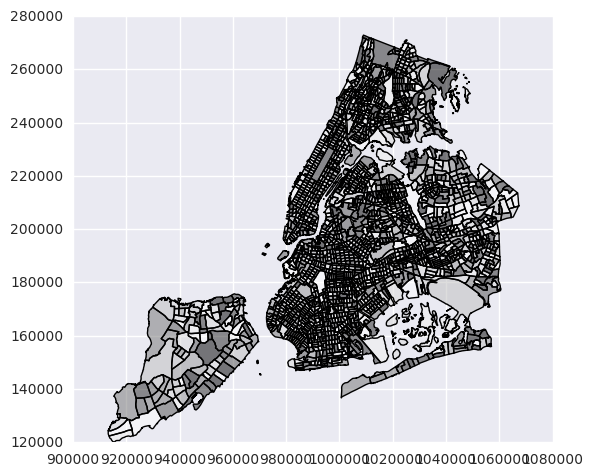

In [8]:
df_ct.plot()

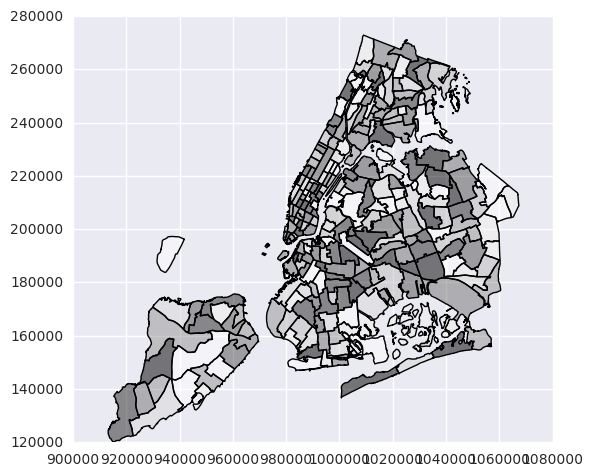

In [9]:
df_tz.plot()

In [10]:
df_tz_latlon = df_tz.copy()
df_tz_latlon = df_tz_latlon.to_crs({'init': 'epsg:4326'})

In [26]:
bike = dd.read_parquet('/bigdata/citibike.parquet')

In [27]:
bike.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,start_ct_id,end_ct_id
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970322,504,1 Ave & E 15 St,40.732220,-73.981659,16950,Customer,NaN,0,NaN,NaN,NaN,NaN
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002953,459,W 20 St & 11 Ave,40.746746,-74.007759,19816,Customer,NaN,0,NaN,NaN,NaN,NaN
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730286,-73.990768,237,E 11 St & 2 Ave,40.730473,-73.986725,14548,Subscriber,1980.0,2,NaN,NaN,NaN,NaN
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718941,-73.992661,499,Broadway & W 60 St,40.769154,-73.981918,16063,Customer,NaN,0,NaN,NaN,NaN,NaN
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734928,-73.992004,410,Suffolk St & Stanton St,40.720665,-73.985176,19213,Subscriber,1986.0,1,NaN,NaN,NaN,NaN


In [28]:
df1 = bike.head(5)

In [29]:
df1 = gpd.GeoDataFrame(df1, crs={'init': 'epsg:4326'}, 
                       geometry=[shapely.geometry.Point(xy) for xy in 
                                 zip(df1.start_station_longitude, df1.start_station_latitude)])

In [30]:
df1

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,start_ct_id,end_ct_id,geometry
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970322,504,1 Ave & E 15 St,40.732220,-73.981659,16950,Customer,NaN,0,NaN,NaN,NaN,NaN,POINT (-73.97032165527344 40.75323104858398)
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002953,459,W 20 St & 11 Ave,40.746746,-74.007759,19816,Customer,NaN,0,NaN,NaN,NaN,NaN,POINT (-74.00295257568359 40.74971771240234)
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730286,-73.990768,237,E 11 St & 2 Ave,40.730473,-73.986725,14548,Subscriber,1980.0,2,NaN,NaN,NaN,NaN,POINT (-73.99076843261719 40.73028564453125)
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718941,-73.992661,499,Broadway & W 60 St,40.769154,-73.981918,16063,Customer,NaN,0,NaN,NaN,NaN,NaN,POINT (-73.99266052246094 40.71894073486328)
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734928,-73.992004,410,Suffolk St & Stanton St,40.720665,-73.985176,19213,Subscriber,1986.0,1,NaN,NaN,NaN,NaN,POINT (-73.99200439453125 40.73492813110352)


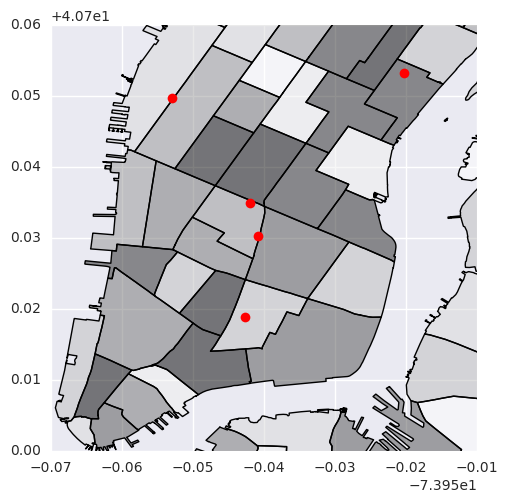

In [31]:
df_tz_latlon.plot()
plt.xlim(-74.02, -73.96)
plt.ylim(40.7, 40.76)
plt.plot(df1.start_station_longitude, df1.start_station_latitude, 'o', color='red')

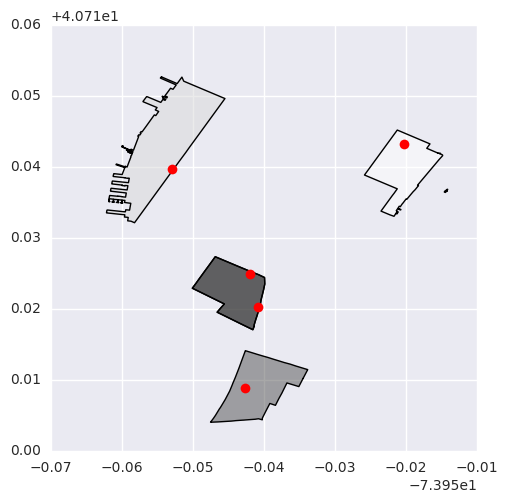

In [32]:
(df_tz_latlon.iloc[(gpd.sjoin(df1, df_tz_latlon, how='left', op='within')['index_right'])]).plot()
plt.plot(df1.start_station_longitude, df1.start_station_latitude, 'o', color='red')

In [33]:
gpd.sjoin(df1, df_tz_latlon, how='left', op='within')

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_ct_id,end_ct_id,geometry,index_right,LocationID,OBJECTID,Shape_Area,Shape_Leng,borough,zone
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970322,504,1 Ave & E 15 St,40.732220,...,NaN,NaN,POINT (-73.97032165527344 40.75323104858398),232,233,233,0.000116,0.048036,Manhattan,UN/Turtle Bay South
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002953,459,W 20 St & 11 Ave,40.746746,...,NaN,NaN,POINT (-74.00295257568359 40.74971771240234),245,246,246,0.000281,0.069467,Manhattan,West Chelsea/Hudson Yards
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730286,-73.990768,237,E 11 St & 2 Ave,40.730473,...,NaN,NaN,POINT (-73.99076843261719 40.73028564453125),112,113,113,0.000058,0.032745,Manhattan,Greenwich Village North
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718941,-73.992661,499,Broadway & W 60 St,40.769154,...,NaN,NaN,POINT (-73.99266052246094 40.71894073486328),147,148,148,0.000070,0.039131,Manhattan,Lower East Side
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734928,-73.992004,410,Suffolk St & Stanton St,40.720665,...,NaN,NaN,POINT (-73.99200439453125 40.73492813110352),112,113,113,0.000058,0.032745,Manhattan,Greenwich Village North


In [34]:
bike = client.persist(bike.set_index('start_station_id', npartitions=64))

In [36]:
bike.head()

,trip_duration,start_time,stop_time,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,start_ct_id,end_ct_id
start_station_id,,,,,,,,,,,,,,,,,,
72,729,2013-07-01 01:15:03,2013-07-01 01:27:12,W 52 St & 11 Ave,40.767273,-73.993927,410,Suffolk St & Stanton St,40.720665,-73.985176,17764,Subscriber,1980.0,1,NaN,NaN,NaN,NaN
72,779,2013-07-01 05:33:50,2013-07-01 05:46:49,W 52 St & 11 Ave,40.767273,-73.993927,388,W 26 St & 10 Ave,40.749718,-74.002953,15150,Subscriber,1973.0,1,NaN,NaN,NaN,NaN
72,729,2013-07-01 05:53:19,2013-07-01 06:05:28,W 52 St & 11 Ave,40.767273,-73.993927,520,W 52 St & 5 Ave,40.759922,-73.976486,18158,Subscriber,1970.0,1,NaN,NaN,NaN,NaN
72,1773,2013-07-01 06:53:29,2013-07-01 07:23:02,W 52 St & 11 Ave,40.767273,-73.993927,363,West Thames St,40.708347,-74.017136,18850,Subscriber,1965.0,2,NaN,NaN,NaN,NaN
72,550,2013-07-01 08:15:07,2013-07-01 08:24:17,W 52 St & 11 Ave,40.767273,-73.993927,525,W 34 St & 11 Ave,40.755943,-74.002113,18177,Subscriber,1972.0,1,NaN,NaN,NaN,NaN


In [38]:
bike.get_partition(63).compute()

,trip_duration,start_time,stop_time,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,start_ct_id,end_ct_id
start_station_id,,,,,,,,,,,,,,,,,,
3289,283,2016-09-02 11:02:59,2016-09-02 11:07:42,W 90 St & Amsterdam Ave,40.790180,-73.972893,3350,W 100 St & Broadway,40.797371,-73.970413,25581,Subscriber,1994.0,1,NaN,NaN,NaN,NaN
3289,1192,2016-09-21 07:50:05,2016-09-21 08:09:57,W 90 St & Amsterdam Ave,40.790180,-73.972893,468,Broadway & W 55 St,40.765266,-73.981926,19289,Subscriber,1958.0,2,NaN,NaN,NaN,NaN
3289,1406,2016-10-08 10:21:53,2016-10-08 10:45:19,W 90 St & Amsterdam Ave,40.790180,-73.972893,3155,Lexington Ave & E 63 St,40.764400,-73.966492,22514,Subscriber,1968.0,1,NaN,NaN,NaN,NaN
3289,1198,2016-09-21 07:50:01,2016-09-21 08:10:00,W 90 St & Amsterdam Ave,40.790180,-73.972893,468,Broadway & W 55 St,40.765266,-73.981926,26324,Subscriber,1948.0,2,NaN,NaN,NaN,NaN
3289,5076,2016-09-24 10:06:20,2016-09-24 11:30:56,W 90 St & Amsterdam Ave,40.790180,-73.972893,3289,W 90 St & Amsterdam Ave,40.790180,-73.972893,17007,Subscriber,1991.0,2,NaN,NaN,NaN,NaN
3289,817,2016-08-26 09:06:10,2016-08-26 09:19:48,W 90 St & Amsterdam Ave,40.790180,-73.972893,457,Broadway & W 58 St,40.766953,-73.981697,16118,Subscriber,1984.0,2,NaN,NaN,NaN,NaN
3289,965,2016-09-01 12:01:58,2016-09-01 12:18:03,W 90 St & Amsterdam Ave,40.790180,-73.972893,281,Grand Army Plaza & Central Park S,40.764397,-73.973717,26513,Subscriber,1970.0,1,NaN,NaN,NaN,NaN
3289,952,2016-08-09 09:33:43,2016-08-09 09:49:36,W 90 St & Amsterdam Ave,40.790180,-73.972893,457,Broadway & W 58 St,40.766953,-73.981697,16248,Subscriber,1984.0,2,NaN,NaN,NaN,NaN
3289,1204,2016-12-13 11:33:19,2016-12-13 11:53:24,W 90 St & Amsterdam Ave,40.790180,-73.972893,3158,W 63 St & Broadway,40.771637,-73.982613,18667,Subscriber,1954.0,2,NaN,NaN,NaN,NaN


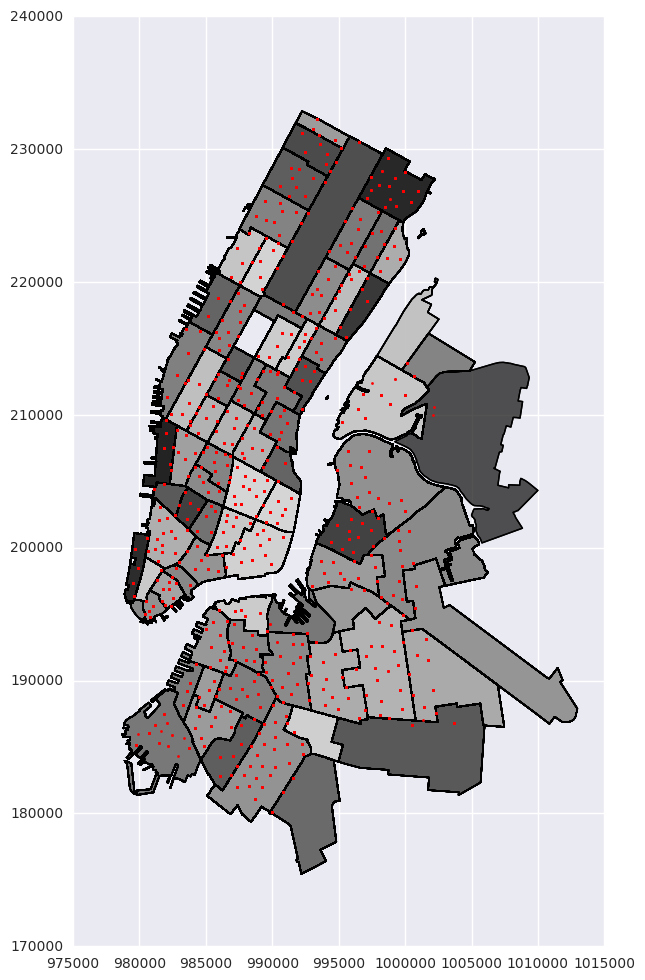

In [39]:
# df_tz_latlon.plot()
df1 = bike.repartition(npartitions=4).tail(20000)
df1 = gpd.GeoDataFrame(df1, crs={'init': 'epsg:4326'}, 
                       geometry=[shapely.geometry.Point(xy) for xy in 
                                 zip(df1.start_station_longitude, df1.start_station_latitude)])
df1 = df1.to_crs(df_tz.geometry.crs)
(df_tz.iloc[(gpd.sjoin(df1, df_tz, how='left', op='within')['index_right'])]).plot()
#plt.xlim(-74.03, -73.95)
#plt.ylim(40.65, 40.83)
# plt.plot(df1.start_station_longitude, df1.start_station_latitude, 'o', color='red')
# del df1
df1.geometry.plot(marker='o', color='red', ax=plt.gca())
plt.gcf().set_size_inches(12, 12)

In [11]:
bike2 = (bike[((bike.start_station_longitude+74.).abs() > 1.) | ((bike.start_station_latitude - 40.75).abs() > 1.)]).compute()

In [13]:
bike2

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,start_ct_id,end_ct_id
297341,1153,2016-12-09 08:53:07,2016-12-09 09:12:20,3240,NYCBS Depot BAL - DYR,0.0,0.0,2023,E 55 St & Lexington Ave,40.759682,-73.970314,25317,Subscriber,1961.0,1,NaN,NaN,NaN,NaN
292738,503,2016-12-23 15:04:58,2016-12-23 15:13:22,3240,NYCBS Depot BAL - DYR,0.0,0.0,3230,Penn Station Valet,40.751282,-73.996925,17615,Subscriber,1986.0,1,NaN,NaN,NaN,NaN
10781,584,2016-12-29 18:48:58,2016-12-29 18:58:42,3240,NYCBS Depot BAL - DYR,0.0,0.0,519,Pershing Square North,40.751873,-73.977707,26062,Subscriber,1992.0,1,NaN,NaN,NaN,NaN


In [44]:
print(shapely.ops.cascaded_union(df_tz_latlon.geometry.convex_hull.values).envelope.centroid)

POINT (-73.97780021354374 40.70582408608647)


In [41]:
shapely.ops.cascaded_union(df_tz_latlon.geometry.convex_hull.values).envelope.bounds

(-74.25559136315209, 40.49611539517035, -73.7000090639354, 40.91553277700258)

In [48]:
-73.9778002 - (-74.2555913)

0.27779110000000173

In [50]:
bike = bike[(bike.start_station_latitude - 40.70582).abs() < 0.21 ]
bike = bike[(bike.start_station_longitude + 73.9778002).abs() < 0.28]
bike = bike[(bike.end_station_latitude - 40.70582).abs() < 0.21 ]
bike = bike[(bike.end_station_longitude + 73.9778002).abs() < 0.28]

In [52]:
bike.count().compute()

trip_duration              36901863
start_time                 36901863
stop_time                  36901863
start_station_id           36901863
start_station_name         36901863
start_station_latitude     36901863
start_station_longitude    36901863
end_station_id             36901863
end_station_name           36901863
end_station_latitude       36901863
end_station_longitude      36901863
bike_id                    36901863
user_type                  36865992
birth_year                 32543076
gender                     36901863
start_taxizone_id                 0
end_taxizone_id                   0
start_ct_id                       0
end_ct_id                         0
dtype: int64

In [55]:
dd.read_parquet('/bigdata/citibike.parquet', columns=['trip_duration']).count().compute()

trip_duration    36902025
dtype: int64

In [56]:
36902025 - 36901863 

162

In [54]:
help(dd.read_parquet)

Help on function read_parquet in module dask.dataframe.io.parquet:

read_parquet(path, columns=None, filters=None, categories=None, index=None, storage_options=None)
    Read ParquetFile into a Dask DataFrame
    
    This reads a directory of Parquet data into a Dask.dataframe, one file per
    partition.  It selects the index among the sorted columns if any exist.
    
    This uses the fastparquet project: http://fastparquet.readthedocs.io/en/latest
    
    Parameters
    ----------
    path : string
        Source directory for data.
        Prepend with protocol like ``s3://`` or ``hdfs://`` for remote data.
    columns: list or None
        List of column names to load
    filters: list
        List of filters to apply, like ``[('x', '>' 0), ...]``
    index: string or None
        Name of index column to use if that column is sorted
    categories: list or None
        For any fields listed here, if the parquet encoding is Dictionary,
        the column will be created with dty

In [57]:
dd.read_parquet('/bigdata/all_trips.parquet', columns=['pickup_datetime']).count().compute()

pickup_datetime    1211479943
dtype: int64

In [59]:
taxi = dd.read_parquet('/bigdata/all_trips.parquet', columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])


In [61]:
taxi = taxi[(taxi.pickup_latitude - 40.70582).abs() < 0.21 ]
taxi = taxi[(taxi.pickup_longitude + 73.9778002).abs() < 0.28]
taxi = taxi[(taxi.dropoff_latitude - 40.70582).abs() < 0.21 ]
taxi = taxi[(taxi.dropoff_longitude + 73.9778002).abs() < 0.28]

In [62]:
taxi.count().compute()

pickup_latitude      1098910207
pickup_longitude     1098910207
dropoff_latitude     1098910207
dropoff_longitude    1098910207
dtype: int64

In [41]:
40.70582 + 0.21, 40.70582 - 0.21

(40.915820000000004, 40.49582)

In [42]:
-73.9778002 - 0.28, -73.9778002 + 0.28

(-74.2578002, -73.6978002)